# Updating and Expanding Group Assignment #1
## Who's Most at Risk? Social Demographics and Traffic Collisions in the City of Los Angeles
**Author: Gema Martinez Castillo** 

Our research will evaluate different socio-demographic characteristics, such as median household income, race and ethnicity, and age to explore which communities are most susceptible to traffic collisions in the City of Los Angeles. This notebook will explore median household income in the City of LA. Unlike the previous assignment, I focused on LA County.

## Static Map: Median Income in LA 

In [1]:
# importing pandas for data exploration 
import pandas as pd
import geopandas as gpd

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

#importing for interactive plots 
import plotly.express as px

In [2]:
# upload acs 2015-2019
income = pd.read_csv('Data/R13808337_SL140.csv')

In [3]:
# rows and columns 
income.shape

(2346, 56)

In [4]:
# too many columns to populate, so we elaborate on info
income.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2346 non-null   int64  
 1   Geo_GEOID      2346 non-null   object 
 2   Geo_NAME       2346 non-null   object 
 3   Geo_QName      2346 non-null   object 
 4   Geo_STUSAB     2346 non-null   object 
 5   Geo_SUMLEV     2346 non-null   int64  
 6   Geo_GEOCOMP    2346 non-null   int64  
 7   Geo_FILEID     2346 non-null   object 
 8   Geo_LOGRECNO   2346 non-null   int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      2346 non-null   int64  
 14  Geo_COUNTY     2346 non-null   int64  
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRAC

In [5]:
#identifying missing leading zeros 
income.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101210
3    6037101220
4    6037101300
Name: Geo_FIPS, dtype: int64

In [6]:
#converting FIPS, STATE, and COUNTY from integer to string 
income = pd.read_csv(
    'Data/R13808337_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [7]:
# checking state and county for leading zeros 
print(income.Geo_FIPS.head(2))  
print(income.Geo_STATE.head(2))     
print(income.Geo_COUNTY.head(2))

0    06037101110
1    06037101122
Name: Geo_FIPS, dtype: object
0    06
1    06
Name: Geo_STATE, dtype: object
0    037
1    037
Name: Geo_COUNTY, dtype: object


In [8]:
# sorting data, identifying columns that have null values and can be deleted
income.columns[income.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [9]:
#deleting columns with null values
income = income.dropna(axis=1,how="all")

In [10]:
#checking refined columns
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2346 non-null   object 
 1   Geo_GEOID      2346 non-null   object 
 2   Geo_NAME       2346 non-null   object 
 3   Geo_QName      2346 non-null   object 
 4   Geo_STUSAB     2346 non-null   object 
 5   Geo_SUMLEV     2346 non-null   int64  
 6   Geo_GEOCOMP    2346 non-null   int64  
 7   Geo_FILEID     2346 non-null   object 
 8   Geo_LOGRECNO   2346 non-null   int64  
 9   Geo_STATE      2346 non-null   object 
 10  Geo_COUNTY     2346 non-null   object 
 11  Geo_TRACT      2346 non-null   int64  
 12  SE_A14006_001  2310 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 238.4+ KB


In [11]:
#keeping necessary columns, informed by the codebook
columns_to_keep = ['Geo_FIPS',
                   'SE_A14006_001']

income = income[columns_to_keep]

In [12]:
# identifying columns in new dataset
columns = list(income) 
columns

['Geo_FIPS', 'SE_A14006_001']

In [13]:
#remaning columns
income.columns = ['FIPS',
'Median Household Income']

In [14]:
# checking dataset
income.sample(5)

FIPS  Median Household Income
2053  06037621400                 107621.0
1505  06037503401                 100498.0
110   06037115401                  71646.0
522   06037204600                  31786.0
1678  06037541606                  40509.0

In [15]:
# merging to City of LA census tracts 
cityofla=gpd.read_file('Data/cityLA.zip')

In [16]:
#reviewing the data
cityofla.info()
cityofla.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GISJOIN     1168 non-null   object  
 1   STATEFP     1168 non-null   object  
 2   COUNTYFP    1168 non-null   object  
 3   TRACTCE     1168 non-null   object  
 4   GEOID       1168 non-null   object  
 5   NAME        1168 non-null   object  
 6   NAMELSAD    1168 non-null   object  
 7   MTFCC       1168 non-null   object  
 8   FUNCSTAT    1168 non-null   object  
 9   ALAND       1168 non-null   float64 
 10  AWATER      1168 non-null   float64 
 11  INTPTLAT    1168 non-null   object  
 12  INTPTLON    1168 non-null   object  
 13  Shape_Leng  1168 non-null   float64 
 14  Shape_Le_1  1168 non-null   float64 
 15  Shape_Area  1168 non-null   float64 
 16  geometry    1168 non-null   geometry
dtypes: float64(5), geometry(1), object(11)
memory usage: 155.3+ KB


GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0  G0600370101110      06      037  101110  06037101110  1011.10   
1  G0600370101122      06      037  101122  06037101122  1011.22   
2  G0600370101210      06      037  101210  06037101210  1012.10   
3  G0600370101220      06      037  101220  06037101220  1012.20   
4  G0600370101300      06      037  101300  06037101300     1013   

               NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Census Tract 1011.10  G5020        S  1142401.0     0.0  +34.2594737   
1  Census Tract 1011.22  G5020        S  2644045.0     0.0  +34.2677213   
2  Census Tract 1012.10  G5020        S   650690.0     0.0  +34.2529724   
3  Census Tract 1012.20  G5020        S   698886.0     0.0  +34.2516083   
4     Census Tract 1013  G5020        S  2581214.0     0.0  +34.2487733   

       INTPTLON   Shape_Leng   Shape_Le_1    Shape_Area  \
0  -118.2929869  4585.520052  4585.520052  1.142400e+06   
1  -118.2901465  9652.233049  9652.233049  2.644046e+06   
2  -118.2907309  3671.776951  3671.776951  6.506895e+05   
3  -118.2816328  3870.684865  3870.684865  6.988841e+05   
4  -118.2709978  8985.054807  8980.005006  2.580326e+06   

                                            geometry  
0  POLYGON ((-2019033.589 -124429.155, -2018948.5...  
1  POLYGON ((-2017297.948 -125225.326, -2017305.0...  
2  POLYGON ((-2018157.786 -125480.623, -2018189.7...  
3  POLYGON ((-2018074.028 -125501.322, -2018030.5...  
4  POLYGON ((-2016412.468 -126301.385, -2016412.4...

<Axes: >

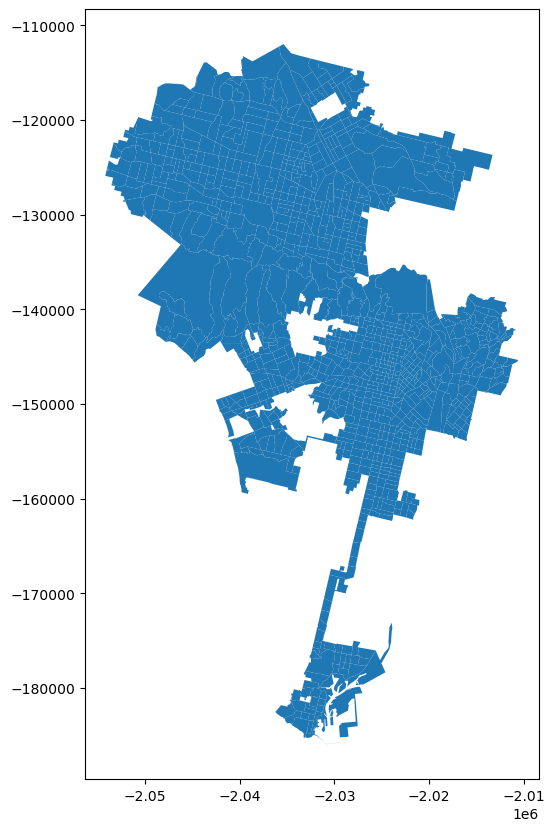

In [17]:
#plotting the shapefile to review data
cityofla.plot(figsize=(12,10))

In [18]:
# adding FIPS column to prepare data for merge 
cityofla['FIPS'] = '06' + '037' + cityofla['TRACTCE']

In [19]:
# checking new column was made 
cityofla.head(2)

GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0  G0600370101110      06      037  101110  06037101110  1011.10   
1  G0600370101122      06      037  101122  06037101122  1011.22   

               NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Census Tract 1011.10  G5020        S  1142401.0     0.0  +34.2594737   
1  Census Tract 1011.22  G5020        S  2644045.0     0.0  +34.2677213   

       INTPTLON   Shape_Leng   Shape_Le_1    Shape_Area  \
0  -118.2929869  4585.520052  4585.520052  1.142400e+06   
1  -118.2901465  9652.233049  9652.233049  2.644046e+06   

                                            geometry         FIPS  
0  POLYGON ((-2019033.589 -124429.155, -2018948.5...  06037101110  
1  POLYGON ((-2017297.948 -125225.326, -2017305.0...  06037101122

In [20]:
# merging shapefile and income data
la_income =cityofla.merge(income,on="FIPS")

In [21]:
# checking that both datasets merged 
la_income.info()
la_income.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GISJOIN                  1168 non-null   object  
 1   STATEFP                  1168 non-null   object  
 2   COUNTYFP                 1168 non-null   object  
 3   TRACTCE                  1168 non-null   object  
 4   GEOID                    1168 non-null   object  
 5   NAME                     1168 non-null   object  
 6   NAMELSAD                 1168 non-null   object  
 7   MTFCC                    1168 non-null   object  
 8   FUNCSTAT                 1168 non-null   object  
 9   ALAND                    1168 non-null   float64 
 10  AWATER                   1168 non-null   float64 
 11  INTPTLAT                 1168 non-null   object  
 12  INTPTLON                 1168 non-null   object  
 13  Shape_Leng               1168 non-null   float64 
 14  

GISJOIN STATEFP COUNTYFP TRACTCE        GEOID     NAME  \
0  G0600370101110      06      037  101110  06037101110  1011.10   
1  G0600370101122      06      037  101122  06037101122  1011.22   
2  G0600370101210      06      037  101210  06037101210  1012.10   
3  G0600370101220      06      037  101220  06037101220  1012.20   
4  G0600370101300      06      037  101300  06037101300     1013   

               NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Census Tract 1011.10  G5020        S  1142401.0     0.0  +34.2594737   
1  Census Tract 1011.22  G5020        S  2644045.0     0.0  +34.2677213   
2  Census Tract 1012.10  G5020        S   650690.0     0.0  +34.2529724   
3  Census Tract 1012.20  G5020        S   698886.0     0.0  +34.2516083   
4     Census Tract 1013  G5020        S  2581214.0     0.0  +34.2487733   

       INTPTLON   Shape_Leng   Shape_Le_1    Shape_Area  \
0  -118.2929869  4585.520052  4585.520052  1.142400e+06   
1  -118.2901465  9652.233049  9652.233049  2.644046e+06   
2  -118.2907309  3671.776951  3671.776951  6.506895e+05   
3  -118.2816328  3870.684865  3870.684865  6.988841e+05   
4  -118.2709978  8985.054807  8980.005006  2.580326e+06   

                                            geometry         FIPS  \
0  POLYGON ((-2019033.589 -124429.155, -2018948.5...  06037101110   
1  POLYGON ((-2017297.948 -125225.326, -2017305.0...  06037101122   
2  POLYGON ((-2018157.786 -125480.623, -2018189.7...  06037101210   
3  POLYGON ((-2018074.028 -125501.322, -2018030.5...  06037101220   
4  POLYGON ((-2016412.468 -126301.385, -2016412.4...  06037101300   

   Median Household Income  
0                  63534.0  
1                  90389.0  
2                  44083.0  
3                  43713.0  
4                  81776.0

<Axes: >

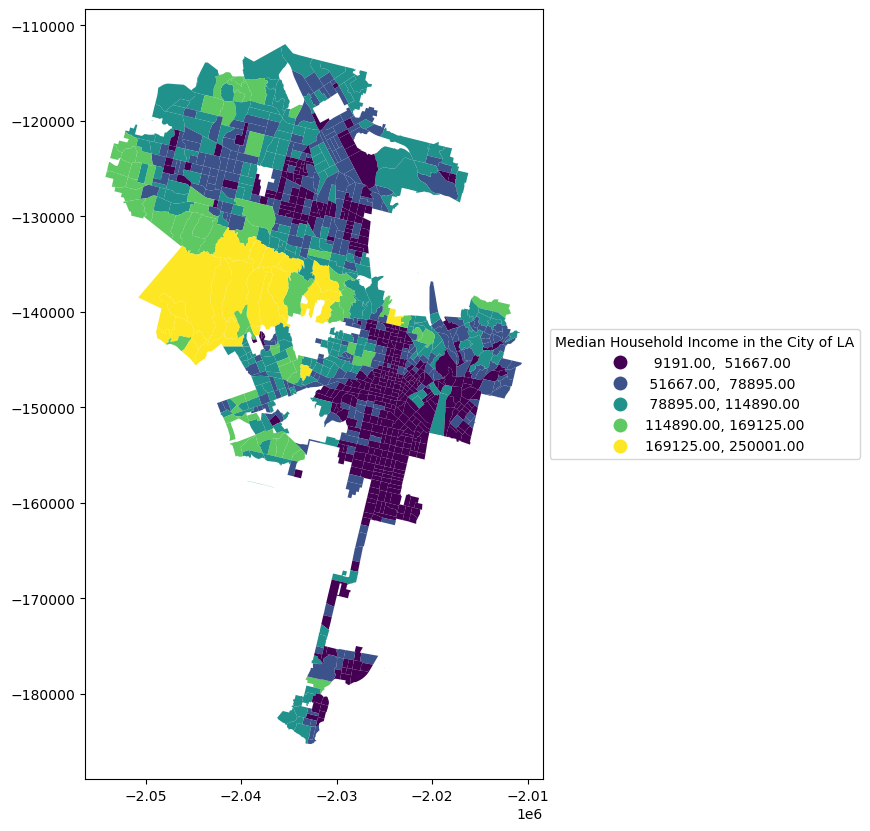

In [22]:
# mapping median household income in City of LA
la_income.plot(figsize=(12,10),
                 column='Median Household Income',
                 legend=True, 
                 scheme='NaturalBreaks',
                legend_kwds={'loc': 'center left', 'title': 'Median Household Income in the City of LA', 'bbox_to_anchor':(1,0.5)})

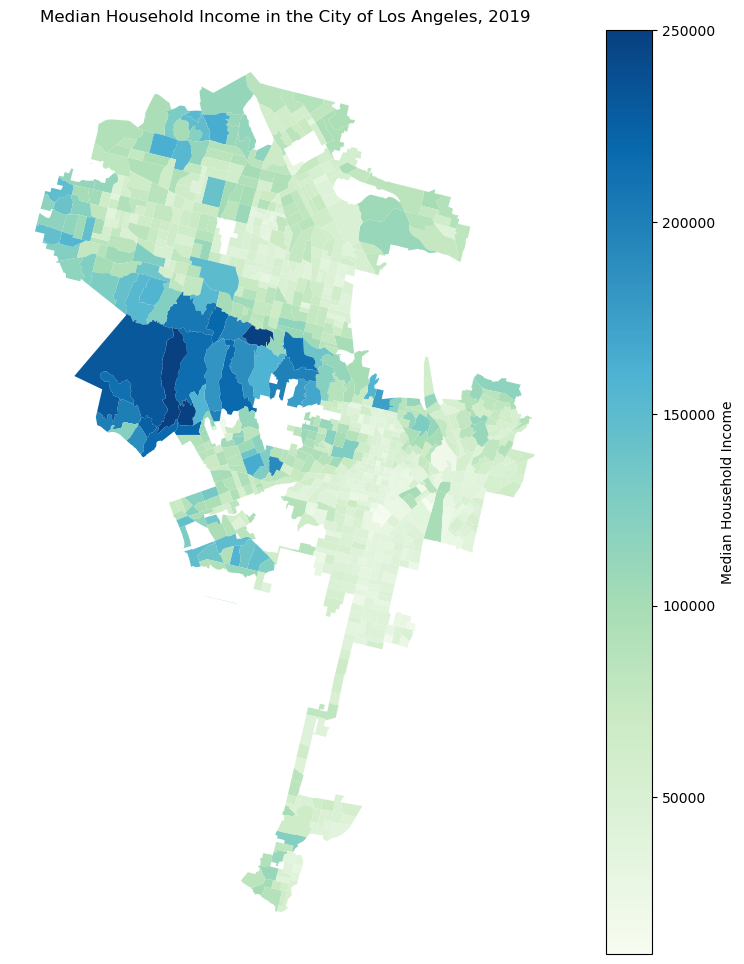

In [23]:
#creating a different version of the map 

fig,ax = plt.subplots(figsize=(12,12))

la_income.plot(ax=ax,column='Median Household Income',legend=True,cmap='GnBu',
             legend_kwds={"label": "Median Household Income", "orientation": "vertical"})


ax.axis('off')
ax.set_title('Median Household Income in the City of Los Angeles, 2019')
plt.savefig('demo.png', transparent=True)

## Static Map: HIN and Median Income Overlay

In [24]:
#importing SCAG HIN GeoJson 
scag_hin = gpd.read_file('Data/High_Injury_Network_SCAG.geojson')

In [25]:
# checking the information 
scag_hin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5964 entries, 0 to 5963
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   OBJECTID              5964 non-null   int32   
 1   SEGMENT_ID            5964 non-null   object  
 2   SEGMENT_NAME          5964 non-null   object  
 3   CITY                  5964 non-null   object  
 4   COUNTY                5964 non-null   object  
 5   MILE                  5964 non-null   float64 
 6   FATALITY_VICTIM       5964 non-null   float64 
 7   SEVERE_INJURY_VICTIM  5964 non-null   float64 
 8   VICTIM_COUNT          5964 non-null   float64 
 9   HIN_AUTO              5964 non-null   object  
 10  HIN_PED               5964 non-null   object  
 11  HIN_BIKE              5964 non-null   object  
 12  HIN_ALL               5964 non-null   object  
 13  TRANSIT_AREA          5964 non-null   object  
 14  EQUITY_AREA           5964 non-null   object  
 

In [26]:
# identifying City of LA  naming convention
scag_hin['CITY'].value_counts()

CITY
Los Angeles         1490
Unincorporated      1060
Long Beach           172
Riverside             94
Santa Ana             91
                    ... 
Lomita                 1
Hidden Hills           1
Westlake Village       1
South Pasadena         1
La Habra Heights       1
Name: count, Length: 183, dtype: int64

In [27]:
#creating new variable only for City of LA hin segements
LA_hin = scag_hin[scag_hin.CITY == 'Los Angeles']

<Axes: >

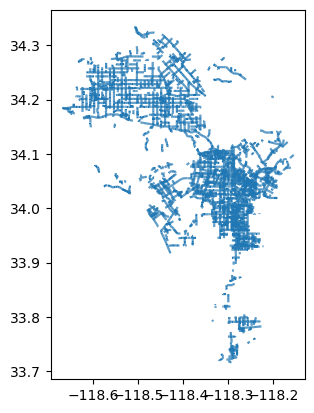

In [28]:
LA_hin.plot()

In [29]:
la_income = la_income.to_crs('EPSG:4326')
print("Original CRS:", la_income.crs)

Original CRS: EPSG:4326


<Axes: >

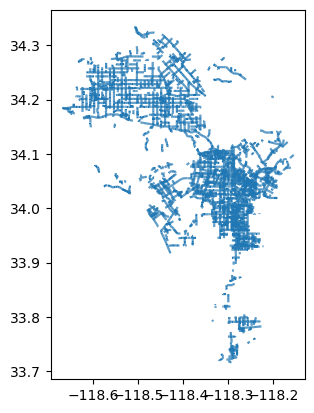

In [30]:
LA_hin.plot()

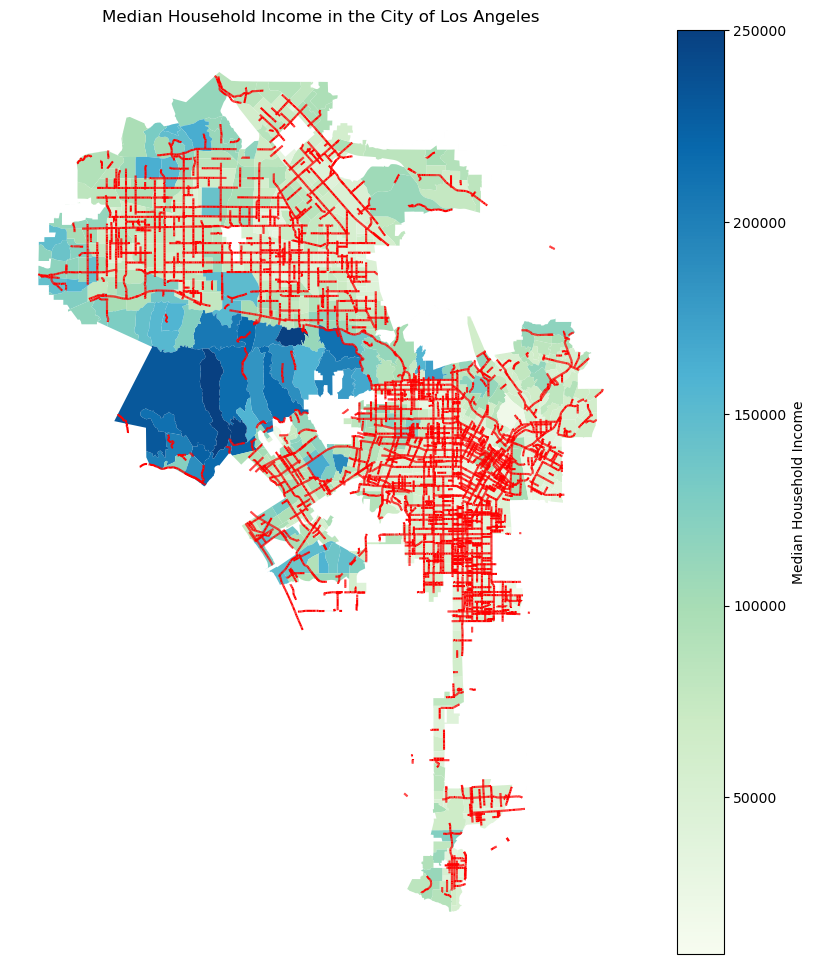

In [31]:
fig,ax = plt.subplots(figsize=(12,12))

la_income.plot(ax=ax,column='Median Household Income',legend=True,cmap='GnBu',
             legend_kwds={"label": "Median Household Income", "orientation": "vertical"})


LA_hin.plot(ax=ax, 
            color='red', 
            markersize= 0.5)


ax.axis('off')
ax.set_title('Median Household Income in the City of Los Angeles')

plt.savefig('HH Income and HIN.png', transparent=True)

## Histogram

In [32]:
fig = px.histogram(la_income, x="Median Household Income", 
                   title='Median Household Income Distribution in the City of Los Angeles, 2019',
                   labels={'Median Household Income': 'Median Household Income ($)'},
                           color_discrete_sequence=['#ff7f0e'],
                  nbins=15)
fig.update_traces(marker_line_width=0, textposition='outside')
fig.update_layout(
    xaxis_title_text='Median Household Income ($)', # xaxis label
    yaxis_title_text='Count', # yaxis label
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

## Team Member Contributions

**Gema** 
- Group Repo Manager
- Designer 
- Conducted an analysis of median income and High Injury Network (HIN).
- Developed a chart illustrating median income variation across the City of Los Angeles.
- Created a static map overlaying median income and HIN.

**Emily**
- Created a shapefile of the City of Los Angeles dataset and merged it with the Los Angeles County dataset.
- Analyzed race and ethnicity in relation to HIN.
- Developed one chart, four static maps, and one interactive map.

**Veronica**
- Notetaker
- Conducted an analysis of age and HIN.
- Developed a chart illustrating age distribution across the City of Los Angeles.
- Created four static maps overlaying age and HIN.
